# Naive Bayes

## Carregando Biblioteca

In [2]:
library(caTools)
library(gplots)
# Naivebayes
library(e1071)
library(naivebayes)
#Preprocessamento
library(CatEncoders)
#Matricas
library(caret)


Attaching package: 'gplots'

The following object is masked from 'package:stats':

    lowess

Warning message:
"package 'naivebayes' was built under R version 3.6.3"naivebayes 0.9.7 loaded

Attaching package: 'CatEncoders'

The following object is masked from 'package:base':

    transform

Loading required package: lattice
Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


## Carregando os dados

In [3]:
df <- read.csv("../datasets/titanic/train.csv", na.strings = '')
head(df)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NA,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NA,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NA,S
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,NA,Q


## Pré-Processamento de Dados

In [4]:
# Extração de Pronomes
df$Name <- ifelse(grepl(", Mr. ", df$Name), 'Mr', as.character(df$Name))
df$Name <- ifelse(grepl("Capt", df$Name), 'Tripulacao', as.character(df$Name))
df$Name <- ifelse(grepl("Don", df$Name), 'Mr', as.character(df$Name))
df$Name <- ifelse(grepl("Major", df$Name), 'Tripulacao', as.character(df$Name))
df$Name <- ifelse(grepl("Col", df$Name), 'Tripulacao', as.character(df$Name))
df$Name <- ifelse(grepl("Dr", df$Name), 'Dr', as.character(df$Name))
df$Name <- ifelse(grepl("Rev", df$Name), 'Rev', as.character(df$Name))
df$Name <- ifelse(grepl("Sir", df$Name), 'Mr', as.character(df$Name))
df$Name <- ifelse(grepl("Jonkheer", df$Name), 'Mr', as.character(df$Name))
df$Name <- ifelse(grepl("Dona", df$Name), 'Mrs', as.character(df$Name))
df$Name <- ifelse(grepl("Countess", df$Name), 'Mrs', as.character(df$Name))
df$Name <- ifelse(grepl("Mme", df$Name), 'Mrs', as.character(df$Name))
df$Name <- ifelse(grepl("Lady", df$Name), 'Mrs', as.character(df$Name))
df$Name <- ifelse(grepl("Mrs", df$Name), 'Mrs', as.character(df$Name))
df$Name <- ifelse(grepl("Mlle", df$Name), 'Miss', as.character(df$Name))
df$Name <- ifelse(grepl("Ms", df$Name), 'Miss', as.character(df$Name))
df$Name <- ifelse(grepl("Miss", df$Name), 'Miss', as.character(df$Name))
df$Name <- ifelse(grepl("Master", df$Name), 'Master', as.character(df$Name))

# Categóricas para Numéricas
le_name <- LabelEncoder.fit(unique(df$Name))
df$Name <- transform(le_name, df$Name)

# Substituir valores ausentes/nulos
media <- mean(df$Age, na.rm = TRUE)
df$Age <- ifelse(is.na(df$Age), media, df$Age)

t <- table(df$Embarked)
moda <- names(t[t == max(t)])

df$Embarked <- ifelse(is.na(df$Embarked), as.character(moda), as.character(df$Embarked) )

# Categórico Para numérico
le_sex <- LabelEncoder.fit(unique(df$Sex))
df$Sex <- transform(le_sex, df$Sex)

le_embarked <- LabelEncoder.fit(unique(df$Embarked))
df$Embarked <- transform(le_embarked, df$Embarked)

# Remoção de colunas
df$PassengerId <- NULL
df$Ticket <- NULL
df$Cabin <- NULL

#Escalonamento 
df[, c('Age', 'Fare')] <- scale(df[, c('Age', 'Fare')])

df$Name = factor(df$Name)
df$Pclass = factor(df$Pclass)
df$Sex = factor(df$Sex)
df$Embarked = factor(df$Embarked)

head(df)
str(df)

Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,4,2,-0.5921480,1,0,-0.5021631,3
1,1,5,1,0.6384304,1,0,0.7864036,1
1,3,3,1,-0.2845034,0,0,-0.4885799,3
1,1,5,1,0.4076970,1,0,0.4204941,3
0,3,4,2,0.4076970,0,0,-0.4860644,3
0,3,4,2,0.0000000,0,0,-0.4778481,2


'data.frame':	891 obs. of  9 variables:
 $ Survived: int  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass  : Factor w/ 3 levels "1","2","3": 3 1 3 1 3 3 1 3 3 2 ...
 $ Name    : Factor w/ 7 levels "1","2","3","4",..: 4 5 3 5 4 4 4 2 5 5 ...
 $ Sex     : Factor w/ 2 levels "1","2": 2 1 1 1 2 2 2 2 1 1 ...
 $ Age     : num  -0.592 0.638 -0.285 0.408 0.408 ...
 $ SibSp   : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch   : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Fare    : num  -0.502 0.786 -0.489 0.42 -0.486 ...
 $ Embarked: Factor w/ 3 levels "1","2","3": 3 1 3 3 3 2 3 3 3 1 ...


# Divisão dos dados em treino e teste

In [5]:
set.seed(0)
divisao <- sample.split(df$Survived, SplitRatio = 0.75)

treino <- subset(df, divisao == TRUE)
teste <-  subset(df, divisao == FALSE)

x_train <- treino[,-1]
y_train <- treino$Survived

x_test <- teste[,-1]
y_test <- teste$Survived

## NaiveBayes

Argumentos

- **x** - Uma matriz numérica ou um quadro de dados de variáveis  categóricas e/ou numéricas.
- **y** - Vetor de classe.
- **formula** - Uma fórmula da classe de formulário ~ x1 + x2 +…. Interações não são permitidas.
- **data** - Tanto um quadro de dados de preditores (categóricos e / ou numéricos) ou uma tabela de contingência.
- **Laplace** -  duplo positivo controlando o alisamento de Laplace. O padrão (0) desativa a suavização de Laplace.
- **subset** - Para dados fornecidos em um quadro de dados, um vetor de índice que especifica os casos a serem usados a amostra de treinamento. (NOTA: Se fornecido, este argumento deve ser nomeado.)
- **na.action** - Uma função para especificar a ação a ser executada se NAs forem encontrados. A ação padrão é não contá-los para o cálculo dos fatores de probabilidade. Uma alternativa é na.omit, que leva à rejeição de casos com valores ausentes em qualquer variável necessária. (NOTA: Se fornecido, este argumento deve ser nomeado.)
- **object** - Um objeto da classe "naiveBayes".
- **newdata** - Um dataframe com novos preditores (com possivelmente menos colunas do que os dados de treinamento). Observe que os nomes das colunas de newdata são comparados com os de dados de treinamento.
- **model** - Se "bruta", as probabilidades a-posteriores condicionais para cada classe são retornadas, e a classe com probabilidade máxima, senão.
- **threshold** - Valor substituindo células com probabilidades dentro do intervalo de eps.
- **eps** - double para especificar um intervalo épsilon para aplicar a suavização laplace (para substituir as probabilidades de zero ou próximo de zero pelo limite.) 

In [6]:
classificador <- naiveBayes(x = x_train, y = y_train)

## Atributos

- **apriori** retorna a quantidade treinada por classe
- **isnumeric** reorna um vertor onde indica se o atriburo é numérico ou não. 
- **levels** retorna as classes
- **tables** retorna a probabilidade por cada atributo

In [7]:
classificador$apriori

y_train
  0   1 
412 256 

In [8]:
classificador$isnumeric

Pclass     Name      Sex      Age    SibSp    Parch     Fare Embarked 
   FALSE    FALSE    FALSE     TRUE     TRUE     TRUE     TRUE    FALSE

In [9]:
classificador$levels

NULL

In [10]:
classificador$tables

$Pclass
       Pclass
y_train         1         2         3
      0 0.1577670 0.1674757 0.6747573
      1 0.4023438 0.2695312 0.3281250

$Name
       Name
y_train           1           2           3           4           5           6
      0 0.007281553 0.029126214 0.082524272 0.815533981 0.048543689 0.012135922
      1 0.015625000 0.058593750 0.367187500 0.238281250 0.312500000 0.000000000
       Name
y_train           7
      0 0.004854369
      1 0.007812500

$Sex
       Sex
y_train         1         2
      0 0.1310680 0.8689320
      1 0.6914062 0.3085938

$Age
       Age
y_train        [,1]      [,2]
      0  0.07550761 0.9704334
      1 -0.04428762 1.0349320

$SibSp
       SibSp
y_train      [,1]      [,2]
      0 0.5339806 1.2326897
      1 0.4375000 0.6416889

$Parch
       Parch
y_train      [,1]      [,2]
      0 0.2815534 0.7404539
      1 0.4335938 0.7742703

$Fare
       Fare
y_train       [,1]      [,2]
      0 -0.1867877 0.6716471
      1  0.3776209 1.4505821

$Embarke

# Prever um valor

In [11]:
Pclass <- 1
Name <- 'Miss'
Sex <- 'female'
Age <- 5
SibSp <- 1
Parch <- 1
Fare <- 500
Embarked <- 'C'

data = data.frame(Pclass, Name, Sex, Age, SibSp, Parch, Fare, Embarked)

#Tratando os Dados
# Categóricas para Numéricas

data$Name <- transform(le_name, as.character(data$Name))
data$Sex  <- transform(le_sex, (data$Sex))
data$Embarked <- transform(le_embarked, as.character(data$Embarked))

data$Name = factor(data$Name)
data$Pclass = factor(data$Pclass)
data$Sex = factor(data$Sex)
data$Embarked = factor(data$Embarked)

data[, c('Age', 'Fare')] <- scale(data[, c('Age', 'Fare')])

#Classificando
previsao = predict(classificador, newdata = data, type = 'class')
previsao

factor(0)
Levels:

## Prever os dados de Teste

In [12]:
previsao = predict(classificador, newdata = x_test, type = 'raw')
previsao = ifelse(previsao[,1] > 0.5, 0, 1)

acuracia = 100 * sum(previsao == y_test)/length(y_test)

acuracia

[1] 77.13004

# Matriz de Confusão

- A função **table** realiza o agrupamento dos dados
- A função **confusionMatriz** da biblioteca **caret** também calcula a matriz de confusão + as métricas

In [13]:
matriz_confusao = table(y_test, previsao)
matriz_confusao

      previsao
y_test   0   1
     0 114  23
     1  28  58

In [14]:
matriz = confusionMatrix(factor(previsao), factor(y_test))
matriz

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 114  28
         1  23  58
                                          
               Accuracy : 0.7713          
                 95% CI : (0.7105, 0.8247)
    No Information Rate : 0.6143          
    P-Value [Acc > NIR] : 4.454e-07       
                                          
                  Kappa : 0.5121          
                                          
 Mcnemar's Test P-Value : 0.5754          
                                          
            Sensitivity : 0.8321          
            Specificity : 0.6744          
         Pos Pred Value : 0.8028          
         Neg Pred Value : 0.7160          
             Prevalence : 0.6143          
         Detection Rate : 0.5112          
   Detection Prevalence : 0.6368          
      Balanced Accuracy : 0.7533          
                                          
       'Positive' Class : 0               
                              

## Personalizando a Matriz de Confusão

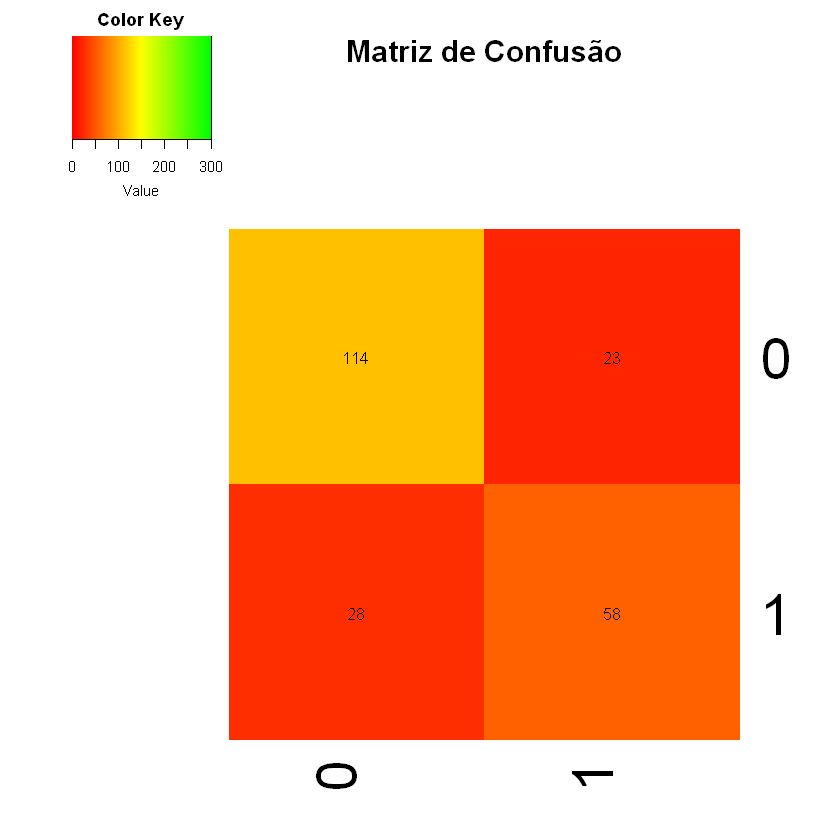

In [15]:
my_palette <- colorRampPalette(c("red", "yellow", "green"))

col_breaks = c(0:50, 51:100, 101:300)

heatmap.2(matriz_confusao,
    Rowv = 'NA',
    cellnote = matriz_confusao, 
    main = "Matriz de Confusão",
    notecol="black",      
    density.info="none",  
    trace="none",        
    col=my_palette,       
    breaks=col_breaks,   
    dendrogram= 'none',     
    Colv="NA" 
)

# Métricas

- **Precisão** que é a fração de instâncias recuperadas que são relevantes, 
- **Recall** - que é a fração de instâncias relevantes que são recuperadas 
- **f-score** - é 2 * precisão * recall / (precisão + recall) é 

In [16]:
precision(factor(previsao), factor(y_test))
'Morto'
precision(factor(previsao), factor(y_test), relevant = 2)
'Vivo'
precision(factor(previsao), factor(y_test), relevant = 1)

[1] 0.8028169

[1] "Morto"

[1] 0.7160494

[1] "Vivo"

[1] 0.8028169

In [17]:
recall(factor(previsao), factor(y_test))
'Morto'
recall(factor(previsao), factor(y_test), relevant = 2)
'Vivo'
recall(factor(previsao), factor(y_test), relevant = 1)

[1] 0.8321168

[1] "Morto"

[1] 0.6744186

[1] "Vivo"

[1] 0.8321168

In [18]:
F_meas(factor(previsao), factor(y_test))
'Morto'
F_meas(factor(previsao), factor(y_test), relevant = 2)
'Vivo'
F_meas(factor(previsao), factor(y_test), relevant = 1)

[1] 0.8172043

[1] "Morto"

[1] 0.6946108

[1] "Vivo"

[1] 0.8172043

# Validação Cruzada

- **method = cv** - indica que iremos usar o método crossvalidation
- **number = 10** - define o número de fold
- **method = nb** - indica que iremos usar o algorítmo de naivebayes

In [36]:
controle_treinamento = trainControl(method = 'cv', number = 10)
modelo = train(Survived ~ ., data = df, 'nb' ,trControl = controle_treinamento)
modelo

ERROR: Error: package klaR is required


In [1]:
install.packages('klaR')

also installing the dependency 'questionr'




  There is a binary version available but the source version is later:
          binary source needs_compilation
questionr  0.7.3  0.7.4             FALSE

package 'klaR' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Adria\AppData\Local\Temp\RtmpyYDwjh\downloaded_packages


installing the source package 'questionr'

Warning message in install.packages("klaR"):
"installation of package 'questionr' had non-zero exit status"